# 🧠 Diabetes Prediction using Machine Learning
This notebook aims to predict whether a patient has diabetes based on diagnostic medical data. We will explore the dataset, preprocess it, train different machine learning models, and compare their performance.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

## 📦 Step 1: Import Libraries
We import the necessary libraries for data manipulation and visualization.

In [ ]:
# Import required libraries for data handling and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Diabetes Data Analysis & Visualization

In this project, I perform a data analysis on a real-world diabetes dataset from Kaggle.  
The goal is to identify key patterns, correlations, and factors associated with the onset of diabetes.  
The analysis includes data cleaning, statistical summaries, visualizations, and documented insights.


# Import Libraries

We import `pandas` and `numpy` for data handling, and `matplotlib` / `seaborn` for creating visualizations.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the Dataset

We read the dataset from a CSV file and display the first few records to get an overview of the data structure.


In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Overview

The `info()` function provides data types and non-null counts,  
while `describe()` gives statistical summaries for each numeric column.


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Values and Duplicates

We check whether the dataset contains missing values or duplicate entries, which could affect our analysis.


In [7]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

# Outlier Detection

Using boxplots, we visually inspect numerical features for outliers,  
which are data points that deviate significantly from the rest of the data and could skew analysis.


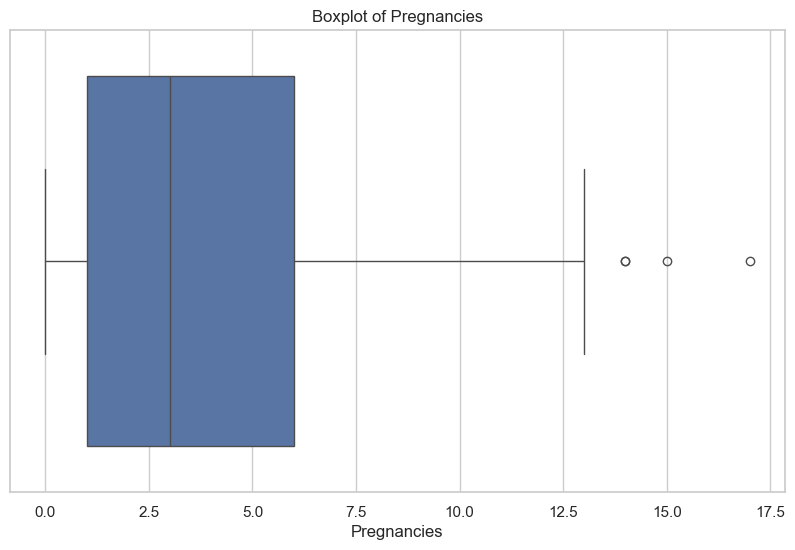

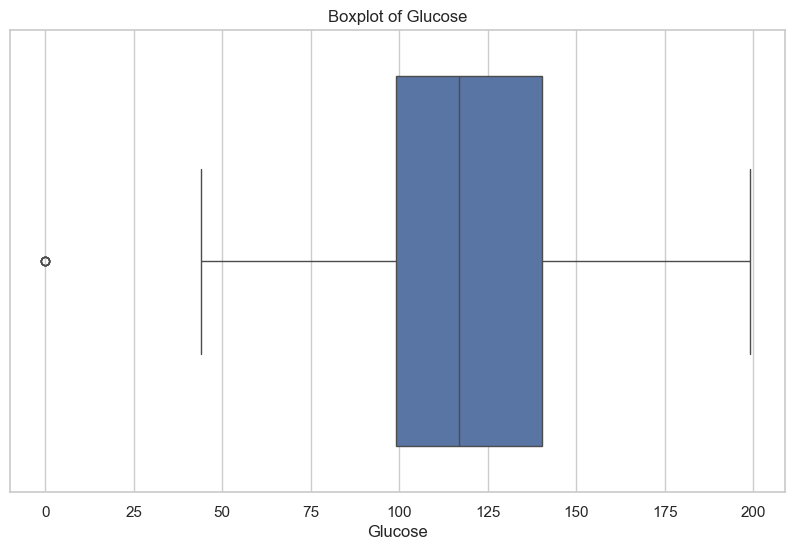

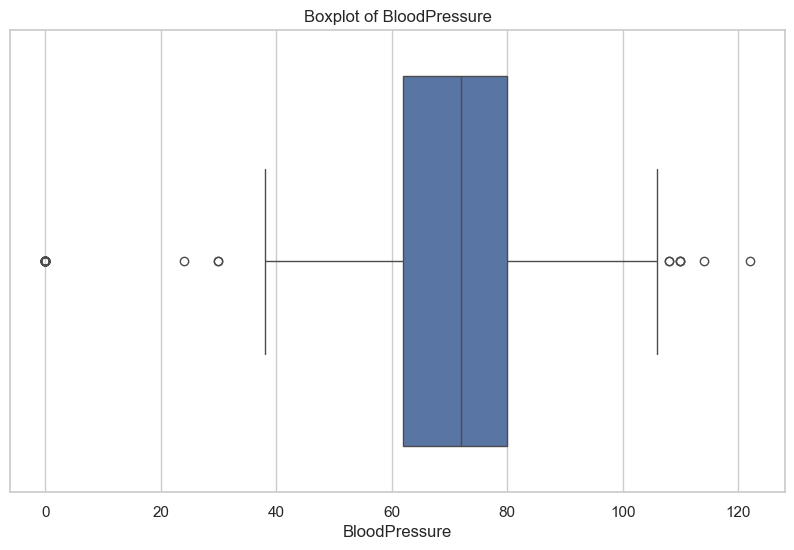

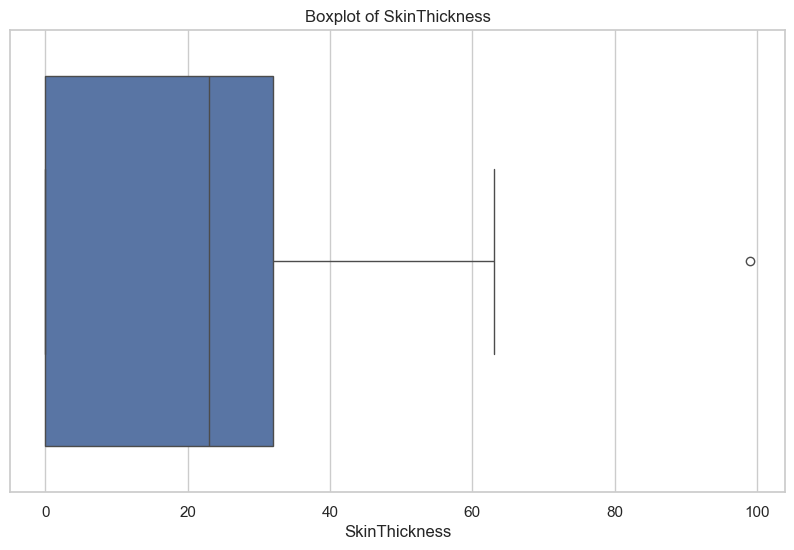

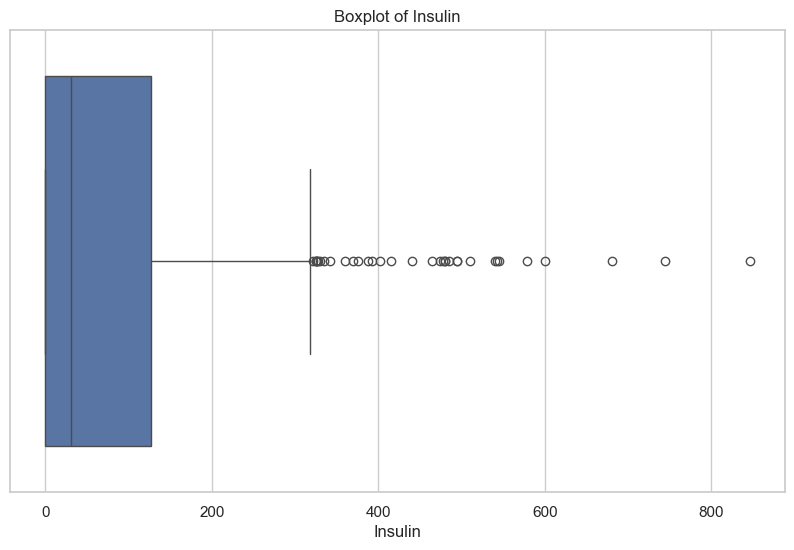

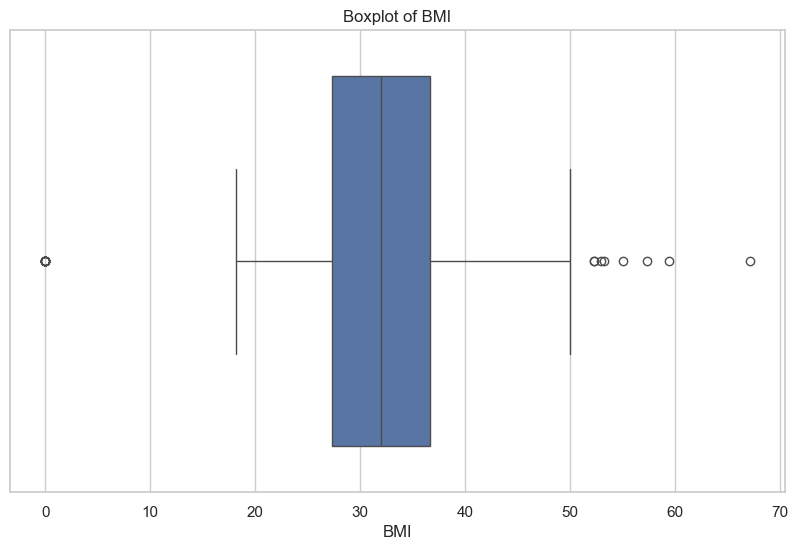

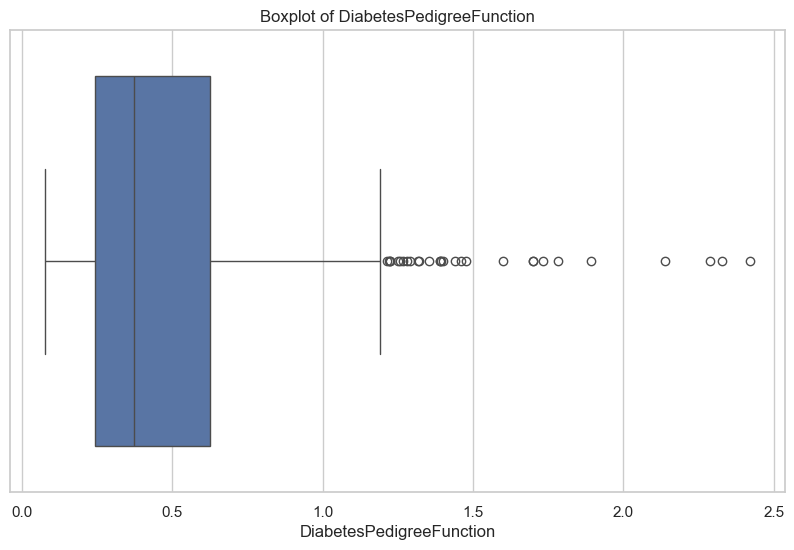

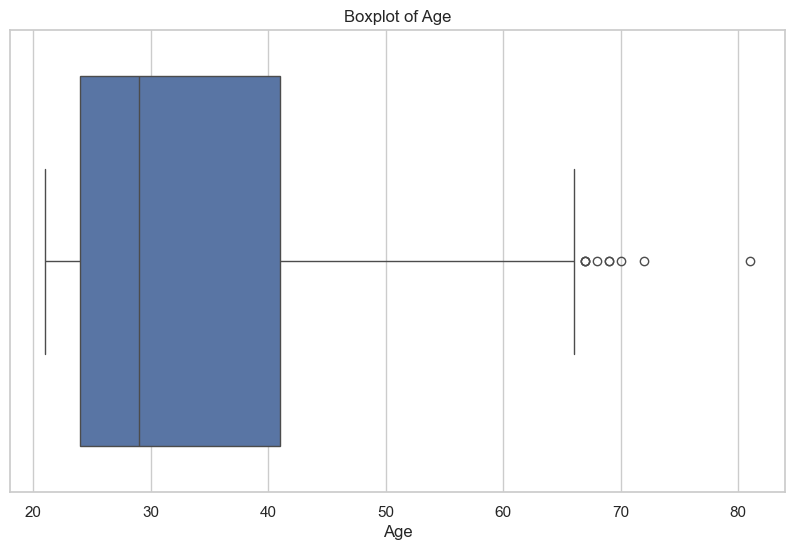

In [8]:
numeric_cols = df.columns[:-1]  

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Feature Distributions

Histograms show the distribution of each numerical feature.  
This helps us understand if data is skewed, normal, or has multiple modes.


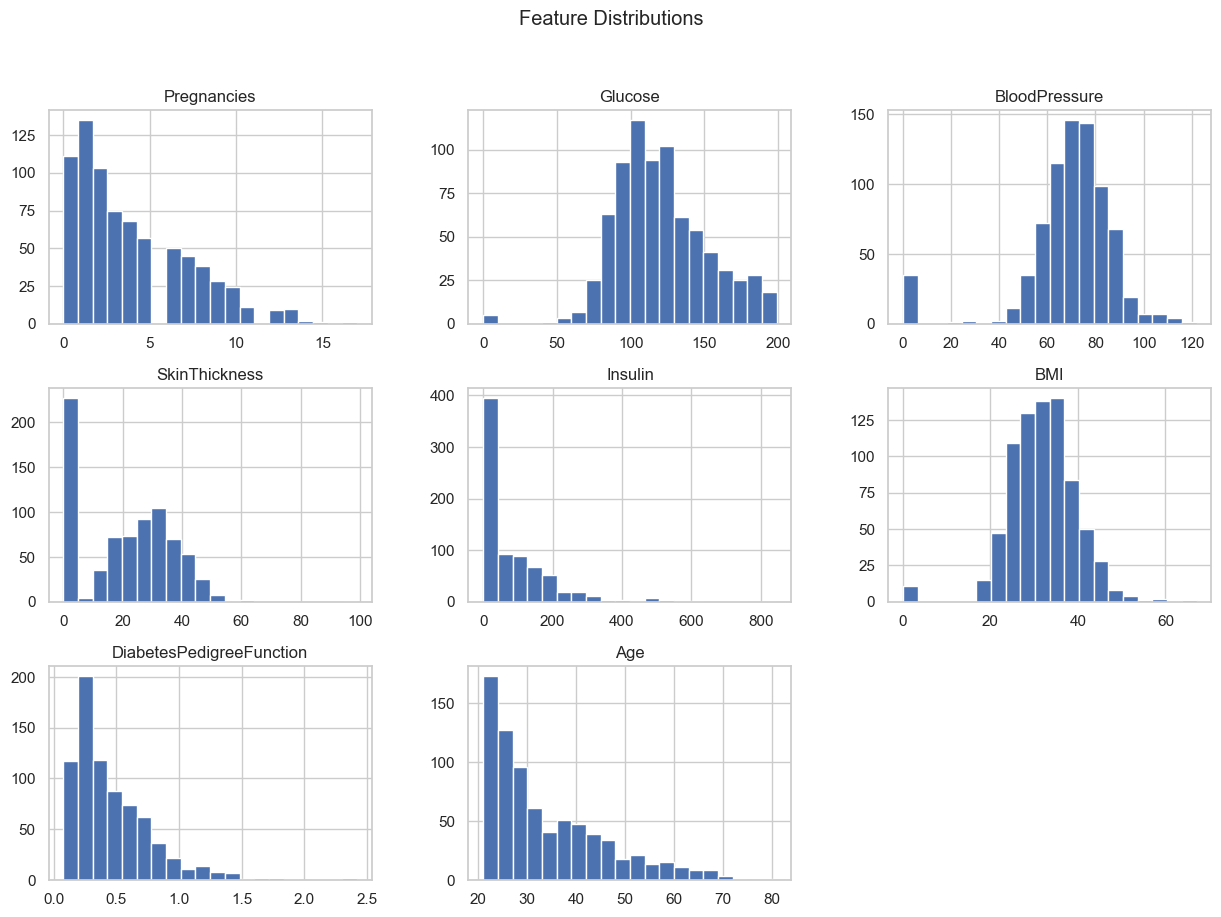

In [9]:
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.show()

# Correlation Matrix

The correlation matrix shows how strongly features relate to each other and to the target variable (Outcome).  
Strong positive or negative correlations may indicate important predictors.


In [10]:
corr_matrix = df.corr()

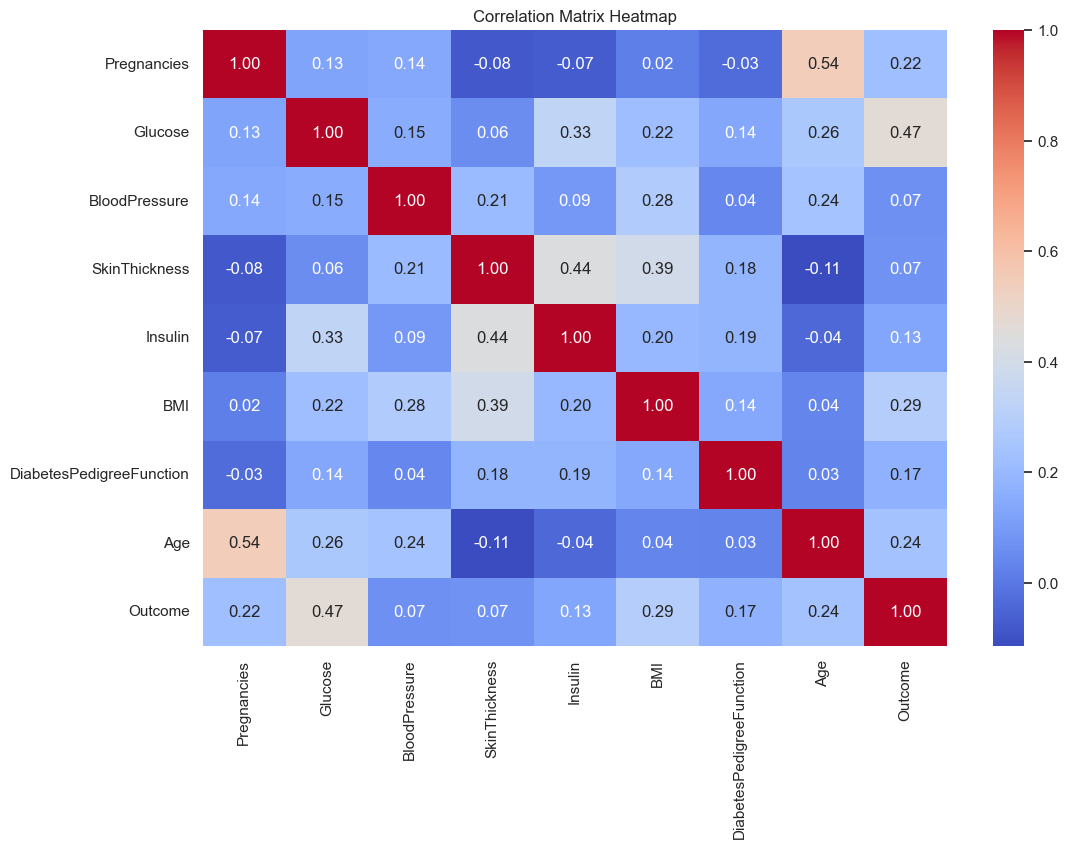

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Pairplot of Features

A pairplot visualizes pairwise relationships between features, colored by diabetes outcome (0 = no diabetes, 1 = diabetes).  
This helps identify feature interactions and separability of classes.



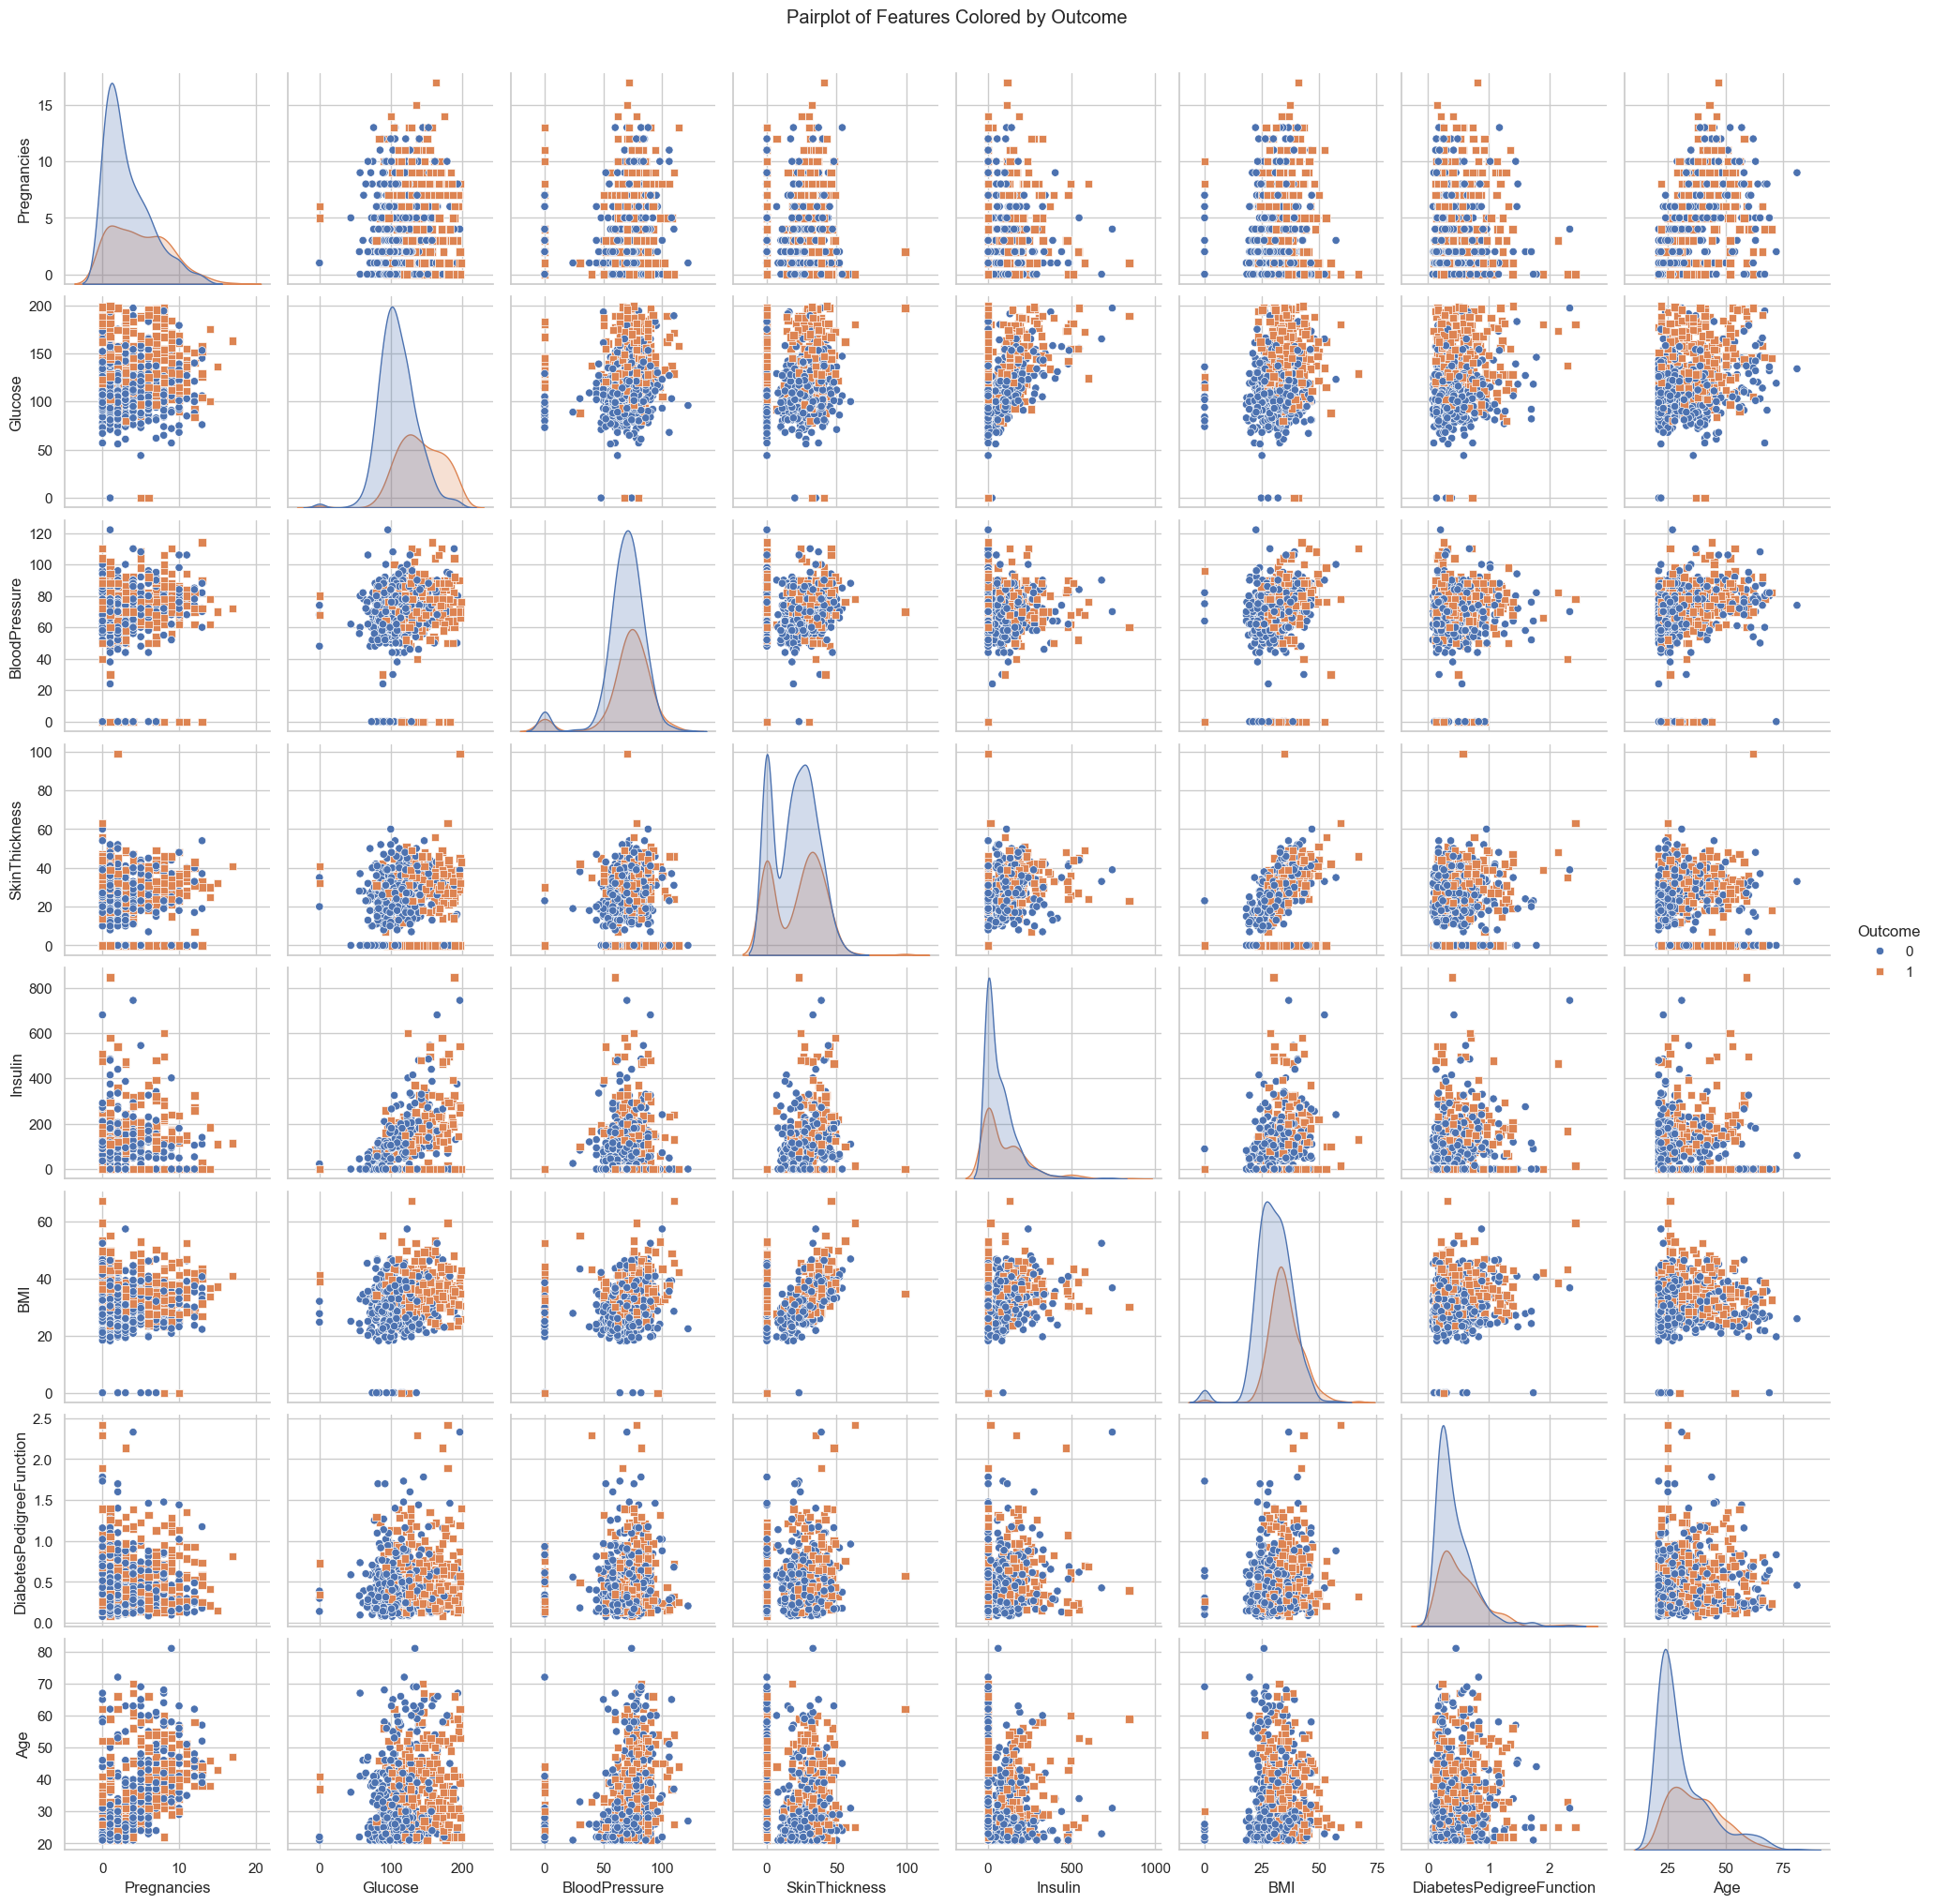

In [14]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pairplot of Features Colored by Outcome', y=1.02)
plt.show()

# Logistic Regression Classification

We split the data into training and test sets to evaluate the model's performance on unseen data.  
Then, we train a logistic regression model to predict the diabetes outcome.  
Finally, we evaluate the model using accuracy, confusion matrix, and classification report.


In [15]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7467532467532467

Confusion Matrix:
 [[78 21]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Trying Different Models

To improve prediction accuracy, we try multiple classification algorithms:  
- Logistic Regression (already done)  
- Random Forest Classifier: a powerful ensemble method that can capture complex patterns.  
- Support Vector Machine (SVM): effective in high-dimensional spaces and can model non-linear decision boundaries with kernels.  

Comparing these models helps us choose the best one for our dataset.


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest accuracy: 0.7207792207792207


In [25]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))

SVM accuracy: 0.7662337662337663


# Model Evaluation with Cross-Validation

Cross-validation provides a more reliable estimate of model performance by splitting the data multiple times into training and test sets.  
Here, we perform 5-fold cross-validation on the Random Forest model to assess its generalization capability and avoid overfitting.


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_scaled, y, cv=5)
print("Random Forest CV accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

Random Forest CV accuracy scores: [0.75324675 0.74675325 0.74025974 0.83660131 0.75163399]
Mean CV accuracy: 0.7656990068754774


## Model Comparison

In [1]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Accuracy': [0.746, 0.766 , 0.72]  
}

df = pd.DataFrame(data)
df


,Model,Accuracy
0,Logistic Regression,0.746
1,SVM,0.766
2,Random Forest,0.720


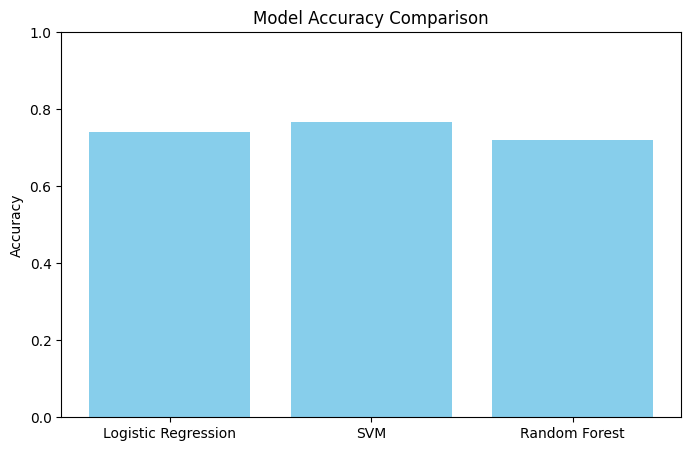

In [2]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [0.74, 0.766, 0.720]  

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()